In [54]:
import os.path
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import yt
import glob
import pandas as pd
import math
import scipy.integrate as integrate
from matplotlib.backends.backend_pdf import PdfPages
mpl.rcParams['figure.dpi'] = 300

In [55]:
t_final = 0.5
Lx = 2.0
u0 = 1.0
v0 = 0.0
alpha = 8*math.pi
beta = 8*math.pi
A = 1/(8*math.pi)
nu = 0.001

In [56]:
def UExact(x,y,t,u0,v0,alpha,beta,A,nu):
    u = u0 - A * beta * math.cos(alpha * (x - u0 * t)) * math.sin(beta * (y - v0 * t)) * math.exp(-(alpha ** 2 + beta ** 2) * nu * t);
    return u


In [57]:
def VExact(x,y,t,u0,v0,alpha,beta,A,nu):
    v = v0 + A * alpha * math.sin(alpha * (x - u0 * t)) * math.cos(beta * (y - v0 * t)) * math.exp(-(alpha ** 2 + beta ** 2) * nu * t);
    return v


In [58]:
def natural_sort(l):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split("([0-9]+)", key)]
    return sorted(l, key=alphanum_key)

In [59]:
root_dir = '/home/dbeckers/tests/ctv'

In [138]:
# methods = ['godunov_ppm','godunov_weno_z','mol_central']
# methods = ['godunov_ppm','godunov_ppm_nonFV']
# methods = ['godunov_ppm','mol_central']
# methods = ['godunov_ppm']
# methods = ['godunov_weno_z']
methods = ['mol_central']
# methods = ['godunov_ppm','godunov_weno_z']
# methods = ['mol_central','periodic_mol_central']

# grid_types = ['uniform']
# grid_types = ['uniform','fine_to_coarse']
grid_types = ['fine_to_coarse']
# grid_types = ['uniform_modulated']
# grid_types = ['fine_to_coarse_modulated']
grid_sizes = [int(64*2**i) for i in range(0,1)]
wave_number = "8pi_1e-4"


dx_list = [Lx/grid_size for grid_size in grid_sizes]
print(grid_sizes)
color_list = [
    "#EE2E2F",
    "#008C48",
    "#185AA9",
    "#F47D23",
    "#662C91",
    "#A21D21",
    "#B43894",
    "#010202",
]
linestyle_list = [
    "solid",
    "dashed",
    "dotted",
    "dashdot"
]
linewidth_list = [
    1.5,
    0.5
]

[64]


In [139]:
# fields = ["x","y","p"]
fields = ["x","y","z","velocityy"]

In [143]:
error_lists = [[[] for j in range(len(grid_types))] for i in range(len(methods))]
df_lists = [[[[] for k in range(len(grid_sizes))] for j in range(len(grid_types))] for i in range(len(methods))]

i_method = -1
for method in methods:
    i_method += 1
    i_grid_type = -1
    for grid_type in grid_types:
        i_grid_type += 1
        i_grid_size = -1
        for grid_size in grid_sizes:
            i_grid_size += 1

            case_dir = os.path.join(root_dir, method, grid_type, wave_number,f'nx_{grid_size}')
            
            # Load plt files
            plt_files = natural_sort(glob.glob(os.path.join(case_dir, "plt*")))
            
            for idx in range(len(plt_files)):
            
                ds = yt.load(plt_files[idx])
                ray = ds.r[0:,1,0]
                srt = np.argsort(ray["x"])
                df = pd.DataFrame({f: np.array(ray[f][srt]) for f in fields})
                t = ds.current_time.value.flatten()[0]
                df["time"] = t
                df["dx"] = [ray.fwidth[i][0].value.flatten()[0] for i in range(len(df["x"].values))]

                df_lists[i_method][i_grid_type][i_grid_size].append(df)
                
            # Plot error
            error_file = os.path.join(case_dir,'ctv.log')
            with open(error_file) as f:
                lines = f.readlines()
                time = [float(line.split()[0]) for line in lines[1:]]
                u_error = [float(line.split()[1]) for line in lines[1:]]
                v_error = [float(line.split()[2]) for line in lines[1:]]
            data={'time':time,'u_error':u_error,'v_error':v_error}
            error_lists[i_method][i_grid_type].append(pd.DataFrame(data)) 


yt : [INFO     ] 2022-08-06 20:19:02,355 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-06 20:19:02,356 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-06 20:19:02,357 Parameters: domain_left_edge          = [ 0.      0.     -0.0625]
yt : [INFO     ] 2022-08-06 20:19:02,358 Parameters: domain_right_edge         = [2.     2.     0.0625]
yt : [INFO     ] 2022-08-06 20:19:03,506 Parameters: current_time              = 0.0625
yt : [INFO     ] 2022-08-06 20:19:03,506 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-06 20:19:03,507 Parameters: domain_left_edge          = [ 0.      0.     -0.0625]
yt : [INFO     ] 2022-08-06 20:19:03,508 Parameters: domain_right_edge         = [2.     2.     0.0625]
yt : [INFO     ] 2022-08-06 20:19:04,620 Parameters: current_time              = 0.125
yt : [INFO     ] 2022-08-06 20:19:04,621 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-06 20:19:04,621 P

yt : [INFO     ] 2022-08-06 20:19:28,348 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-06 20:19:28,349 Parameters: domain_left_edge          = [ 0.      0.     -0.0625]
yt : [INFO     ] 2022-08-06 20:19:28,350 Parameters: domain_right_edge         = [2.     2.     0.0625]
yt : [INFO     ] 2022-08-06 20:19:29,431 Parameters: current_time              = 1.375
yt : [INFO     ] 2022-08-06 20:19:29,432 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-06 20:19:29,433 Parameters: domain_left_edge          = [ 0.      0.     -0.0625]
yt : [INFO     ] 2022-08-06 20:19:29,433 Parameters: domain_right_edge         = [2.     2.     0.0625]
yt : [INFO     ] 2022-08-06 20:19:30,652 Parameters: current_time              = 1.4375
yt : [INFO     ] 2022-08-06 20:19:30,652 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-06 20:19:30,653 Parameters: domain_left_edge          = [ 0.      0.     -0.0625]
yt : [INFO     ] 202

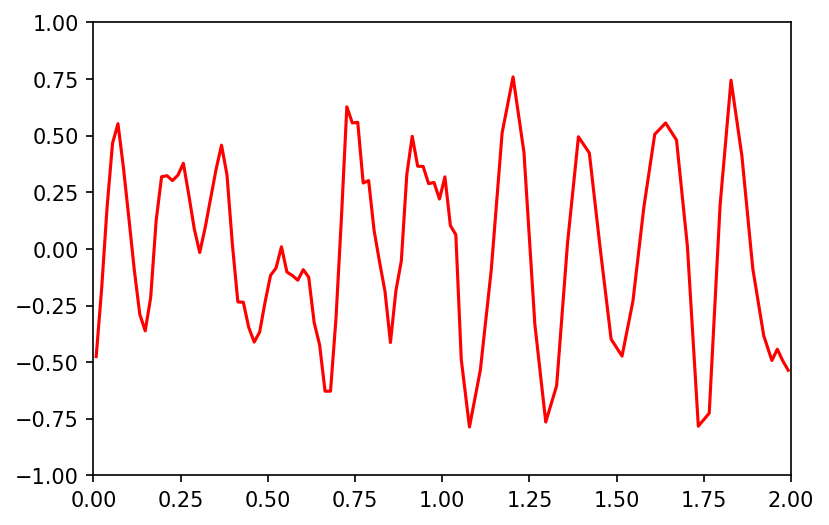

In [156]:
plt.rcParams["animation.html"] = "jshtml"

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-1, 1))
line, = ax.plot([], [], color="red")

def init():
    line.set_data([], [])
    return line,
def animate(i):
    df = df_lists[0][0][0][i]
    x = df["x"].values
    y = df["velocityy"].values
    line.set_data(x, y)
    return line,

FuncAnimation(fig, animate, init_func=init, frames=len(df_lists[0][0][0]), interval=200, blit=True)

In [147]:
plt.rcParams["animation.html"] = "jshtml"
sliceplot = yt.SlicePlot(ds, "z", ("velocityy"))
sliceplot.set_zlim(("velocityy"), -1, 1)
# sliceplot.set_log(("velocityy"), True, symlog_auto=True)
fig = sliceplot.plots[("velocityy")].figure


def animate(i):
    ds = yt.load(plt_files[i])
    sliceplot._switch_ds(ds)
    return 

# FuncAnimation(fig, animate, frames=len(plt_files), interval=200)
FuncAnimation(fig, animate, frames=1, interval=200)

yt : [INFO     ] 2022-08-06 20:25:55,837 xlim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:25:55,837 ylim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:25:55,838 xlim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:25:55,839 ylim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:25:55,840 Making a fixed resolution buffer of (('boxlib', 'velocityy')) 800 by 800
yt : [WARNING  ] 2022-08-06 20:25:56,013 Plot image for field ('boxlib', 'velocityy') has both positive and negative values. Min = -0.891652, Max = 0.891652.
yt : [WARNING  ] 2022-08-06 20:25:56,014 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2022-08-06 20:25:56,274 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-06 20:25:56,275 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-06 20:25:56,276 Parameters: domain_left_edge          = [ 0.      0.     -0.0625]
yt : [INFO     ] 2022-08-06 20:25:56,277 Parameters: domain_r

In [154]:
sliceplot = yt.SlicePlot(ds, "z", ("velocityy"))
fig = sliceplot.plots[("velocityy")].figure
ax = sliceplot.plots[("velocityy")].axes
ax.axhline(0,0,1,color="red",linewidth=3)

yt : [INFO     ] 2022-08-06 20:28:38,919 xlim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:28:38,919 ylim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:28:38,920 xlim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:28:38,921 ylim = 0.000000 2.000000
yt : [INFO     ] 2022-08-06 20:28:38,922 Making a fixed resolution buffer of (('boxlib', 'velocityy')) 800 by 800
yt : [WARNING  ] 2022-08-06 20:28:39,071 Plot image for field ('boxlib', 'velocityy') has both positive and negative values. Min = -0.891652, Max = 0.891652.
yt : [WARNING  ] 2022-08-06 20:28:39,072 Switching to symlog colorbar scaling unless linear scaling is specified later


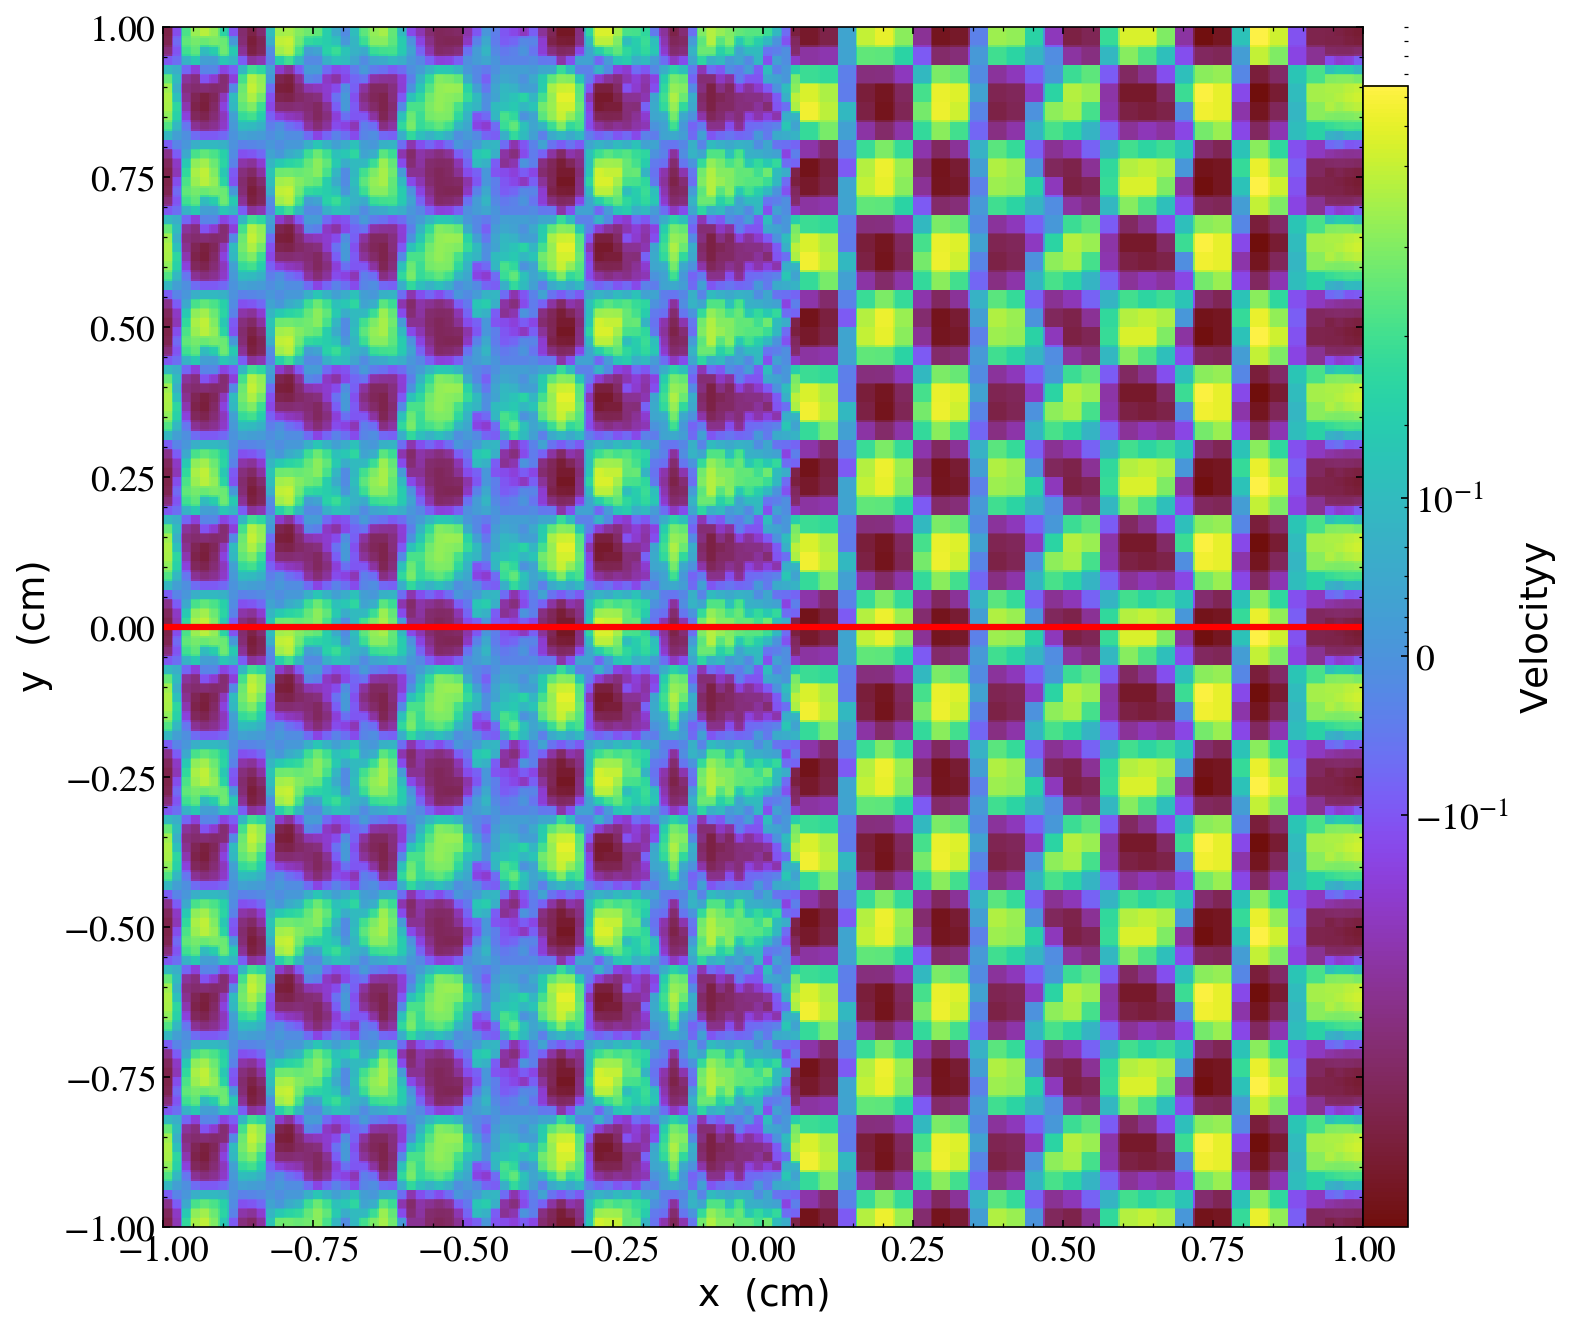

In [155]:
fig